# Detecting Codeup Anomalies
#### Data Scientists : Shawn Brown, Stephen Perry, Brandon Navarrete

In [1]:
# imports
import pandas as pd 
import numpy as np 

# brandon's imports
import brandons_wrangle as bw

# shawn's imports
import acquire as ac
import prepare as prep

# stephen's imports
import sp

import warnings
warnings.filterwarnings('ignore')

# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [2]:
#acquiring and preparing my data
df = ac.wrangle_codeup()

In [3]:
#a quick look at the dataframe
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,endpoint,user_id,cohort_id,ip,student
date_time,,,,,,,,,,,,,
2018-01-26 09:55:03,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,/,1,8.0,97.105.19.61,True
2018-01-26 09:56:02,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,java-ii,1,8.0,97.105.19.61,True
2018-01-26 09:56:05,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,java-ii/object-oriented-programming,1,8.0,97.105.19.61,True
2018-01-26 09:56:06,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,slides/object_oriented_programming,1,8.0,97.105.19.61,True
2018-01-26 09:56:24,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,javascript-i/conditionals,2,22.0,97.105.19.61,True


In [4]:
#getting the most frequently visited pages for each program
program_1 = prep.student_df(df, 1.0)
program_2 = prep.student_df(df, 2.0)
program_3 = prep.student_df(df, 3.0)
program_4 = prep.student_df(df, 4.0)

In [5]:
#getting the top three most frequently visited pages for program 1
prep.Q_two(program_1)

,endpoint,count
cohort_id,,
1.0,javascript-i,150
1.0,html-css,104
8.0,java-iii,55
8.0,appendix,55
21.0,mkdocs/search_index.json,12
21.0,spring/fundamentals/views,11
22.0,java-iii,314
22.0,javascript-i,278
28.0,classification/overview,584


In [6]:
#getting the top three most frequently visited pages for program 2
prep.Q_two(program_2)

,endpoint,count
cohort_id,,
1.0,javascript-i/introduction/working-with-data-ty...,12
1.0,javascript-i/javascript-with-html,12
13.0,content/html-css,17
13.0,content/javascript,22
14.0,index.html,868
14.0,javascript-i,227
16.0,index.html,16
16.0,spring,10
18.0,javascript-ii,21


In [7]:
#getting the top three most frequently visited pages for program 3
prep.Q_two(program_3)

,endpoint,count
cohort_id,,
21.0,spring/fundamentals/security/authentication,9
21.0,spring/fundamentals/views,8
22.0,appendix,112
22.0,mkdocs/search_index.json,96
23.0,html-css/css-ii/media-queries,32
23.0,html-css/css-i/selectors-and-properties,31


In [8]:
#getting the top three most frequently visited pages for program 4
prep.Q_two(program_4)

,endpoint,count
cohort_id,,
21.0,spring,54
21.0,java-i,29
22.0,jquery,19
22.0,javascript-i,17


<div class="alert alert-block alert-success">
<b>For each program:</b>

* Program 1: javascript-i is the most consistently viewed topic

* Program 2: javascript-i is the most consistently viewed topic

* Program 3: css is the most consistently viewed topic

* Program 4: javascript is the most consistently viewed topic

</div>

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

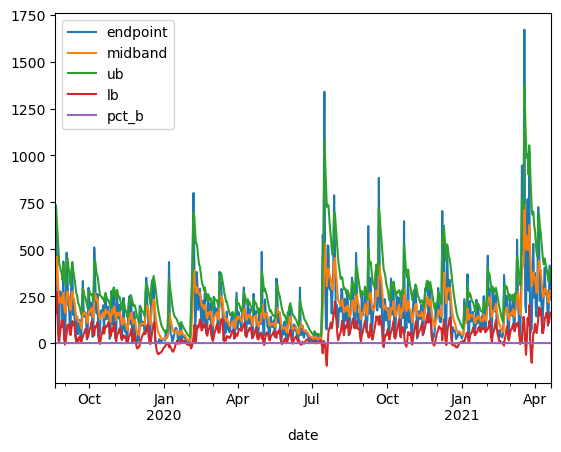

In [9]:
sp.data_science_curriculum_access()

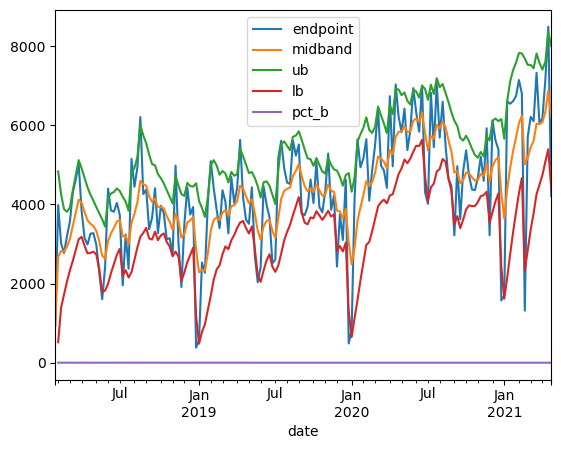

In [10]:
sp.web_dev_curriculum_access()

<div class="alert alert-block alert-success">
<b>Takeaways: Takeaway: Jemison data science cohort, which graduated Aug 2020, fell in the date range for the 3 major spikes in website hits (Feb 2020m April, July 2020)</b>


</div>

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [11]:
# Import Brandon's Data
navdf = bw.get_logs_data(bw.get_connection)

In [12]:
# Prep Brandon's Data, get clean data, student data, and specific student info.
navdf, students, page_views_per_student ,student_info = bw.prepare(navdf)

In [13]:
page_views_per_student.sort_values(by = 'pages_accessed').head(3)

,pages_accessed
id,
62,4
137,10
24,26


In [14]:
# take a peak at student 62
student_info

,id,cohort,ip,endpoint,program_id,updated_at,created_at,end_date,start_date,name,datetime
datetime,,,,,,,,,,,
2018-01-29 13:08:55,62,NaN,70.123.209.40,/,2.0,2020-09-21 18:06:27,2020-09-21 18:06:27,2021-03-30,2020-09-21,Jupiter,2018-01-29 13:08:55
2018-01-29 13:08:57,62,NaN,70.123.209.40,java-ii,2.0,2020-09-21 18:06:27,2020-09-21 18:06:27,2021-03-30,2020-09-21,Jupiter,2018-01-29 13:08:57
2018-01-29 13:09:01,62,NaN,70.123.209.40,java-iii,2.0,2020-09-21 18:06:27,2020-09-21 18:06:27,2021-03-30,2020-09-21,Jupiter,2018-01-29 13:09:01
2018-01-29 13:09:14,62,NaN,70.123.209.40,spring,2.0,2020-09-21 18:06:27,2020-09-21 18:06:27,2021-03-30,2020-09-21,Jupiter,2018-01-29 13:09:14


<div class="alert alert-block alert-success">
<b>Takeaways on student 62:</b>

* This student started on 2020-09-21 and ended on 2021-03-30, about 6 months.
* They accessed the pages in 2018, all within an hour of each other, before they started at Codeup
* Was in the the Jupiter cohort
* This student was in web Dev and only accessed the Codeup page 4 times. Once on the home page, the java-ii ,java-iii, and spring.
* All ip's trace back to San Antonio, Tx

</div>

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [15]:
# tells us how many staff members have been using the website, and returns a dataframe of everything they accessed
staff = ac.check_staff(df)
# a peek at the dataframe
staff.head(1)

There is 1 staff member(s)


,0
0,javascript/primitive-types


In [16]:
#returns two dataframes, one of the non students who werent just looking at the homepage, 
#and another that is a set of date_times and the number of pages accessed in that timestamp
df_2, df_abnormal = prep.web_scraping(df)

In [17]:
#the second dataframe
df_abnormal

,count
date_time,
2019-03-03 22:52:06,21
2019-03-03 22:52:07,30
2019-03-03 22:52:08,25
2019-03-03 22:52:09,30
2019-03-03 22:52:10,25
2019-03-03 22:52:11,25
2019-03-03 22:52:12,12
2019-12-19 23:57:56,12
2019-12-19 23:57:58,12


In [18]:
#an example of one of the time stamps from above, showing the same user accessing multiple pages within one second
df_2[df_2['date_time'] == '2019-03-03 22:52:07'].head()

,date_time,id,name,slack,start_date,end_date,created_at,updated_at,program_id,endpoint,user_id,cohort_id,ip,student
158449,2019-03-03 22:52:07,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,javascript-i/introduction,341,29.0,204.44.112.76,False
158450,2019-03-03 22:52:07,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,html-css/css-ii/bootstrap-grid-system,341,29.0,204.44.112.76,False
158451,2019-03-03 22:52:07,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,html-css/css-ii/bootstrap-introduction,341,29.0,204.44.112.76,False
158452,2019-03-03 22:52:07,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,javascript-i/introduction/primitive-types,341,29.0,204.44.112.76,False
158453,2019-03-03 22:52:07,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,javascript-i/introduction/operators,341,29.0,204.44.112.76,False


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
 
- Every staff request is by the same person, but there are 9 different ip addresses from that person

- An overwhelming majority of the data is from users with no information, which I believe means they were not students of Codeup, and a majority of those were not simply people looking at Codeup's homepage

- Around 10% of the people to visit Codeups homepage ended up being students

- There were at least three individuals who scraped a significant amount of data from the Codeup website over the course of the data's life

</div>

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

<div class="alert alert-block alert-success">
<b>Takeaways:</b>

*

</div>

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [19]:
# I want to make sure im looking at verifiable students who look like they have graduated
# only these programs had queries after graduation.
program1,program2,program4 = bw.grad_activity(students)

#### top refrences for program id 1.0

In [20]:
# a dataframe which shows the unique pages, with a count of how many times they were accessed students graduation or end date
program1

,count
endpoint,
classification/overview,584
javascript-i,605
/,3513


#### top refrences for program id 2.0

In [21]:
# a dataframe which shows the unique pages, with a count of how many times they were accessed students graduation or end date
program2

,count
endpoint,
spring,218
/,361
index.html,373


#### top refrences for program id 4.0

In [22]:
# a dataframe which shows the unique pages, with a count of how many times they were accessed students graduation or end date
program4

,count
endpoint,
javascript-i,46
spring,68
/,151


<div class="alert alert-block alert-success">
<b>Takeaways on Top Reference Material:</b>

* Since this was a short project, these are just snapshots of verifable students who look like the have graduated or had a end date.
* I would like to see why program 3.0 had no queries after an end date.

</div>

# 7. Which lessons are least accessed?

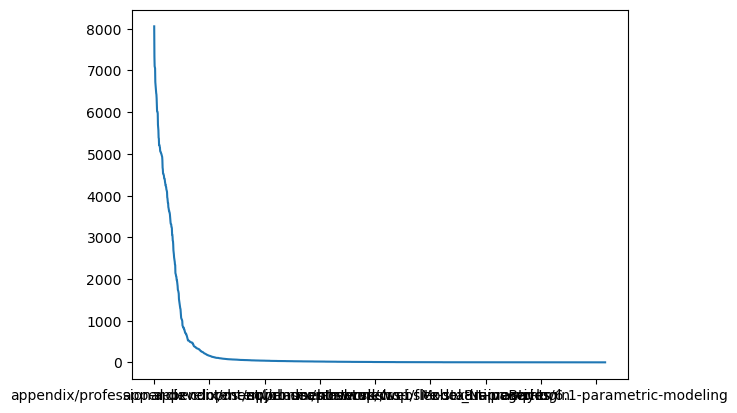

In [23]:
sp.least_hits()

<div class="alert alert-block alert-success">
<b>Takeaway: Here is a sampling of some lessons that are among the least accessed:
"creating a repository, data science pipeline, python series, stats simulation" </b>

*

</div>

# 8. Anything else I should be aware of?

<div class="alert alert-block alert-success">
<b>Takeaways:</b>

*

</div>